# Emulator Tardis Notebook

## EDA 

In this section we will just look at how our data looks like and what sort of things we need to do to get it in the right format for our model. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from sklearn.metrics import mean_squared_error

2023-04-16 09:37:40.914043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
X, y = pd.read_csv('../data_predictor/abundances.csv'), pd.read_csv('../data/target.csv')

In [3]:
X.head()

,O,Si,S,Mg,Ca,Ti+Cr,Fe,Ni56
0,0.032016,0.062298,0.277058,0.186371,0.220107,0.141192,0.036655,0.044302
1,0.028190,0.108022,0.141695,0.035636,0.152498,0.138558,0.078081,0.317321
2,0.067910,0.308458,0.175158,0.015401,0.317441,0.066522,0.002386,0.046725
3,0.261674,0.066003,0.147235,0.008054,0.156008,0.210933,0.003150,0.146944
4,0.036498,0.104231,0.247088,0.156911,0.102188,0.194698,0.064081,0.094305


In [4]:
y.head()

,t_rad0,t_rad1,t_rad2,t_rad3,t_rad4,t_rad5,t_rad6,t_rad7,t_rad8,t_rad9,...,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19
0,16322.466961,17160.500022,17248.747939,17210.034799,16992.526533,16590.213053,15848.069524,15074.020976,14135.662020,13134.343766,...,0.150147,0.157453,0.158076,0.162592,0.165243,0.167486,0.172687,0.179994,0.183273,0.219720
1,16076.725698,16663.477463,16742.159099,16670.531044,16459.989846,16034.915803,15662.785631,15043.215587,14329.828893,13557.324835,...,0.143089,0.147867,0.148121,0.151483,0.154617,0.154576,0.154890,0.160190,0.171282,0.210742
2,16292.363521,16987.615950,17124.118713,17043.460975,16725.527827,16221.424463,15589.097450,15050.866696,14299.282381,13536.915800,...,0.140014,0.139098,0.137311,0.140751,0.141462,0.146319,0.149139,0.151458,0.159388,0.200917
3,16480.848232,17242.829510,17447.454746,17318.104011,17038.541491,16813.555903,16326.157433,15816.495728,15102.890527,14334.438904,...,0.134428,0.139153,0.143224,0.146216,0.143029,0.144950,0.152108,0.156458,0.173671,0.215554
4,15856.141441,16378.280847,16326.022407,16096.203472,15776.571566,15290.421566,14720.290626,14159.782917,13548.728047,12977.930869,...,0.158785,0.161259,0.161936,0.159117,0.158633,0.164979,0.163773,0.167888,0.182158,0.220767


Text(0.5, 1.0, 't_rad dist')

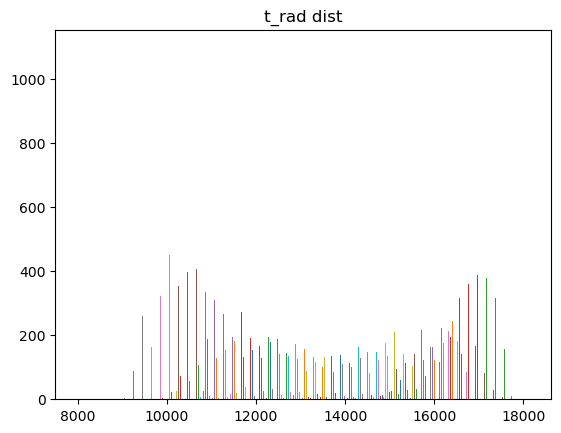

In [149]:
plt.hist(y[:,:20], bins=200);
plt.title("t_rad dist")

In [161]:

1e-14

1e-14

Text(0.5, 1.0, 'w distribution')

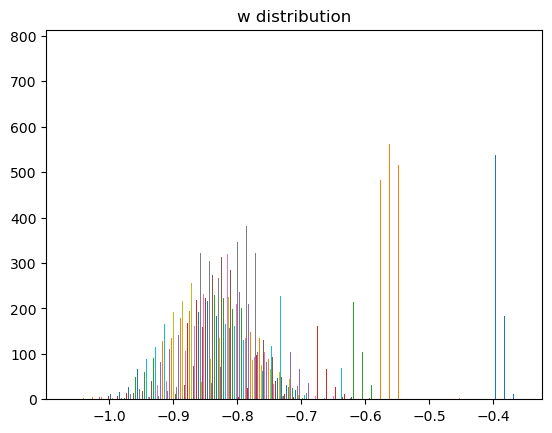

In [175]:
plt.hist(np.log10(y[:,20:]), bins=200);
plt.title('w distribution')

## Scale the data
We will use the Standard Norm to standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = X.values#np.log10(X)
y = y.values#np.log10(y)

In [6]:
X_scaled = X#(X - X.min())/(X.max() - X.min())
y_scaled = y#(y - y.min())/(y.max() - y.min())

## Split into training and testing

In [132]:
X_train.shape

(6000, 8)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=222, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=222)

In [8]:
import tensorflow as tf

def max_fractional_error(y_true, y_pred):
    # Calculate the maximum fractional error between y_true and y_pred
    diff = tf.abs(y_true - y_pred)
    frac = diff / tf.maximum(tf.abs(y_true), tf.keras.backend.epsilon())
    max_frac = tf.reduce_max(frac)
    return max_frac


In [9]:
def meanFE(y_true, y_pred):
    # Calculate the mean fractional error between y_true and y_pred
    diff = tf.abs(y_true - y_pred)
    frac = diff / tf.maximum(tf.abs(y_true), tf.keras.backend.epsilon())
    mfe = tf.reduce_mean(frac)
    return mfe

In [10]:
#log_cosh

In [8]:
basicModel = Sequential()
basicModel.add(Dense(200, input_dim = X.shape[1], activation = 'softplus',  kernel_initializer='glorot_normal',))
basicModel.add(Dense(200, activation='softplus', kernel_initializer='VarianceScaling', ))
basicModel.add(Dense(20, activation='softplus', kernel_initializer='VarianceScaling',))
basicModel.compile(loss='mean_absolute_error', optimizer='nadam')
print(basicModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1800      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 20)                4020      
                                                                 
Total params: 46,020
Trainable params: 46,020
Non-trainable params: 0
_________________________________________________________________
None


2023-03-27 20:50:53.073087: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
!pip install graphviz 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00


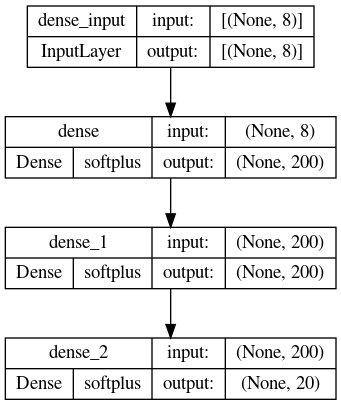

In [10]:
tf.keras.utils.plot_model(
    basicModel,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False
)

In [12]:
basicModel2 = Sequential()
basicModel2.add(Dense(200, input_dim = X.shape[1], activation = 'softplus',  kernel_initializer='he_normal',))
basicModel2.add(BatchNormalization(axis = -1))
basicModel2.add(Dense(200, activation='softplus', kernel_initializer='VarianceScaling', ))
basicModel2.add(BatchNormalization())
basicModel2.add(Dense(20, activation='softplus', kernel_initializer='VarianceScaling',))
basicModel2.compile(loss='mean_absolute_error', optimizer='nadam') #MSE seems to not work for dilution factor

In [186]:
w = np.log(y_train[:,20:]+1e-16)
w

array([[-11.02149579, -11.52966245, -11.90229567, ..., -12.57438342,
        -12.33091279, -11.96585326],
       [-11.05306783, -11.53531309, -11.83469253, ..., -12.72283094,
        -12.55338722, -12.09549934],
       [-10.9687419 , -11.36987459, -11.67830733, ..., -12.46193216,
        -12.3792912 , -11.99618151],
       ...,
       [-10.93065852, -11.39948026, -11.74086035, ..., -12.46348676,
        -12.38202296, -12.11926963],
       [-10.94146467, -11.38689846, -11.68103331, ..., -12.31384612,
        -12.241259  , -11.92408162],
       [-10.87947792, -11.29951296, -11.602596  , ..., -12.44734667,
        -12.30641819, -11.97788984]])

In [13]:
basicModel.fit(X_train, y_train[:,:20], epochs=100, verbose=1, batch_size=100 )
basicModel2.fit(X_train, y_train[:,20:], epochs=70, verbose=1, batch_size=100 )

Epoch 1/100
60/60 [==============================] - 2s 3ms/step - loss: 13195.2412
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 12758.4023
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 11333.5889
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 8278.0947
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 3543.3694
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 963.7655
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 534.4412
Epoch 8/100
60/60 [==============================] - 0s 2ms/step - loss: 533.4697
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 533.3929
Epoch 10/100
60/60 [==============================] - 0s 2ms/step - loss: 533.2884
Epoch 11/100
60/60 [==============================] - 0s 2ms/step - loss: 533.4776
Epoch 12/100
60/60 [==============================] - 0s 2ms/step - loss: 533.3802
Epoch

In [14]:
yhat = basicModel(X_test)
yhat2 = basicModel2(X_test, training = False)


In [23]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.3 MB/s eta 0:00:0000:0100:01


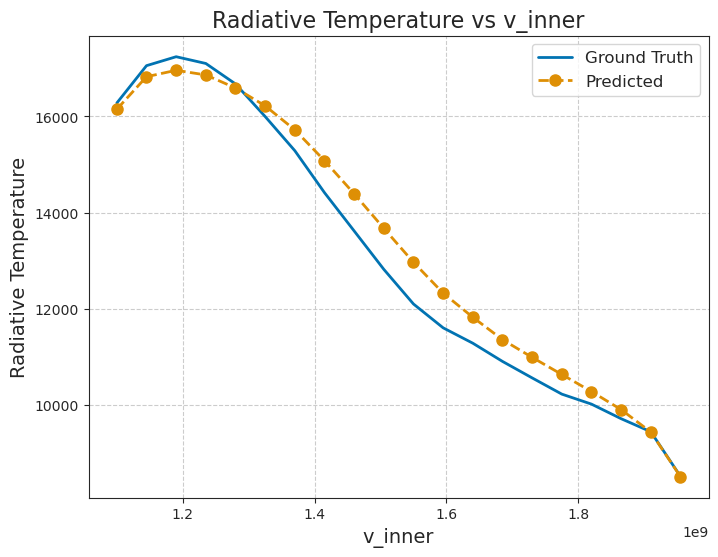

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('ticks')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(v_inner, y_test[0,:20], label='Ground Truth', linewidth=2)
ax.plot(v_inner, yhat[0], '--o', label='Predicted', linewidth=2, markersize=8)

ax.set_xlabel('v_inner', fontsize=14)
ax.set_ylabel('Radiative Temperature', fontsize=14)
ax.set_title('Radiative Temperature vs v_inner', fontsize=16)
ax.legend(fontsize=12)

ax.grid(True, which='major', linestyle='--')

plt.show()

In [199]:
model1 = Sequential()
model1.add(Dense(200, input_dim=X.shape[1], activation='softplus', kernel_initializer='glorot_normal', ))
model1.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model1.add(Dense(200, activation='softplus', kernel_initializer='VarianceScaling', ))
model1.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model1.add(Dense(200, activation='softplus', kernel_initializer='VarianceScaling', ))
model1.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model1.add(Dense(200, activation='softplus', kernel_initializer='VarianceScaling', ))
model1.add(BatchNormalization())
model1.add(Dense(40, activation='softplus', kernel_initializer='VarianceScaling',))
model1.add(BatchNormalization())


model1.compile(loss='mean_squared_error', optimizer='nadam')
print(model1.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 200)               1800      
                                                                 
 batch_normalization_62 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dense_113 (Dense)           (None, 200)               40200     
                                                                 
 batch_normalization_63 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dense_114 (Dense)           (None, 200)               40200     
                                                                 
 batch_normalization_64 (Bat  (None, 200)            

In [188]:
model2 = Sequential()
model2.add(Dense(256, input_dim=X.shape[1], activation='softplus', kernel_initializer='glorot_normal', ))
model2.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(Dense(256, activation='softplus', kernel_initializer='VarianceScaling', ))
model2.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(Dense(256, activation='softplus', kernel_initializer='VarianceScaling', ))
model2.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(Dense(256, activation='softplus', kernel_initializer='VarianceScaling', ))
model2.add(BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(Dense(20, activation='softplus', kernel_initializer='VarianceScaling',))

model2.compile(loss='mean_squared_error', optimizer='nadam')
print(model2.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 256)               2304      
                                                                 
 batch_normalization_58 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_98 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_59 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_99 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_60 (Bat  (None, 256)            

In [212]:
y_train[:,:20].shape

(6000, 20)

In [213]:
model1.fit(X_train, y_train[:,:20], epochs=70, batch_size=70, verbose=1, validation_data=(X_val, y_val[:,:20]))

Epoch 1/70
86/86 [==============================] - 1s 7ms/step - loss: 182941664.0000 - val_loss: 183195472.0000
Epoch 2/70
86/86 [==============================] - 1s 6ms/step - loss: 182933184.0000 - val_loss: 183183312.0000
Epoch 3/70
86/86 [==============================] - 0s 6ms/step - loss: 182927280.0000 - val_loss: 183176816.0000
Epoch 4/70
86/86 [==============================] - 1s 6ms/step - loss: 182922560.0000 - val_loss: 183169232.0000
Epoch 5/70
86/86 [==============================] - 0s 5ms/step - loss: 182918240.0000 - val_loss: 183163824.0000
Epoch 6/70
86/86 [==============================] - 1s 6ms/step - loss: 182914384.0000 - val_loss: 183159440.0000
Epoch 7/70
86/86 [==============================] - 0s 6ms/step - loss: 182910784.0000 - val_loss: 183153632.0000
Epoch 8/70
86/86 [==============================] - 0s 6ms/step - loss: 182907312.0000 - val_loss: 183152272.0000
Epoch 9/70
86/86 [==============================] - 1s 6ms/step - loss: 182904048.0000 -

In [174]:
model2.fit(X_train, y_train[:,20:], epochs=200, batch_size=100, verbose=1, validation_data=(X_val, y_val[:,20:]))

Epoch 1/200
60/60 [==============================] - 3s 10ms/step - loss: 1.4676 - val_loss: 1.2919
Epoch 2/200
60/60 [==============================] - 0s 6ms/step - loss: 1.2451 - val_loss: 1.1202
Epoch 3/200
60/60 [==============================] - 0s 6ms/step - loss: 1.0733 - val_loss: 1.0356
Epoch 4/200
60/60 [==============================] - 0s 5ms/step - loss: 1.0243 - val_loss: 1.0191
Epoch 5/200
60/60 [==============================] - 0s 5ms/step - loss: 1.0107 - val_loss: 1.0106
Epoch 6/200
60/60 [==============================] - 0s 5ms/step - loss: 1.0054 - val_loss: 1.0044
Epoch 7/200
60/60 [==============================] - 0s 5ms/step - loss: 1.0027 - val_loss: 1.0034
Epoch 8/200
60/60 [==============================] - 0s 6ms/step - loss: 1.0024 - val_loss: 1.0043
Epoch 9/200
60/60 [==============================] - 0s 5ms/step - loss: 1.0014 - val_loss: 1.0015
Epoch 10/200
60/60 [==============================] - 0s 6ms/step - loss: 0.9997 - val_loss: 1.0003
Epoch 11

In [214]:
yhat1 = model1(X_test, training = False)
yhat2 = model2(X_test, training = False)


In [184]:
yhat1

<tf.Tensor: shape=(2000, 20), dtype=float32, numpy=
array([[3.7148204e-02, 4.1180711e-02, 1.1597092e-02, ..., 2.4951767e-06,
        4.2831985e-06, 9.5594305e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7857010e-05, 2.9362559e-06, 2.3348323e-06, ..., 1.5792287e-10,
        1.9069325e-12, 7.1631662e-15],
       ...,
       [6.6692144e-01, 5.8487153e-01, 5.6225365e-01, ..., 6.7492461e-01,
        5.8473754e-01, 5.4093891e-01],
       [3.9787035e-20, 6.7278687e-21, 1.5572076e-22, ..., 5.9508192e-27,
        5.1260367e-26, 3.3165093e-24],
       [7.8836007e-23, 2.0345038e-28, 6.1982077e-31, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [141]:
mean_squared_error(y_test, yhat)

ValueError: y_true and y_pred have different number of output (40!=20)

In [16]:
v_inner = np.array([1.100e+09, 1.145e+09, 1.190e+09, 1.235e+09, 1.280e+09, 1.325e+09,
       1.370e+09, 1.415e+09, 1.460e+09, 1.505e+09, 1.550e+09, 1.595e+09,
       1.640e+09, 1.685e+09, 1.730e+09, 1.775e+09, 1.820e+09, 1.865e+09,
       1.910e+09, 1.955e+09])

In [216]:
yhat1

<tf.Tensor: shape=(2000, 20), dtype=float32, numpy=
array([[ 10.187363 ,  10.277939 ,   9.942703 , ...,  12.116781 ,
         11.861215 ,  11.742485 ],
       [ 14.03072  ,  14.728542 ,  15.013119 , ...,  16.335896 ,
         16.360874 ,  16.955667 ],
       [ -7.678795 , -10.689732 , -11.706884 , ...,  -7.460601 ,
         -6.979289 ,  -3.192092 ],
       ...,
       [ -1.740696 ,  -1.722992 ,  -2.1189575, ...,  -4.1478043,
         -3.463399 ,  -2.2452009],
       [  8.242641 ,   8.903397 ,   9.456924 , ...,  14.864489 ,
         15.185927 ,  17.501997 ],
       [ 14.56321  ,  13.936966 ,  13.118809 , ...,  14.189663 ,
         13.4353895,  10.605965 ]], dtype=float32)>

In [57]:
y_test[:,20:]

TypeError: '(slice(None, None, None), slice(20, None, None))' is an invalid key

In [144]:
yhat[:,20:]

<tf.Tensor: shape=(2000, 0), dtype=float32, numpy=array([], shape=(2000, 0), dtype=float32)>

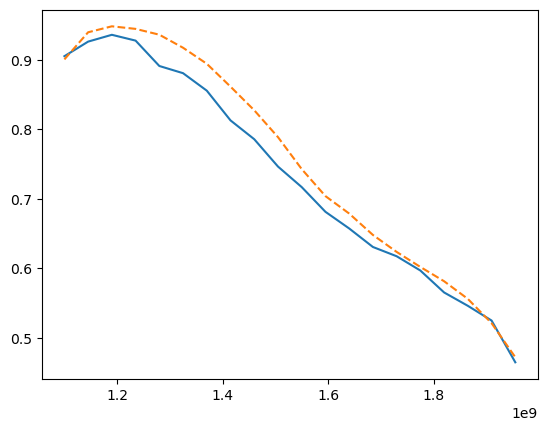

In [68]:
plt.plot(v_inner, yhat[10, :20])
plt.plot(v_inner, y_test[10, :20], '--')

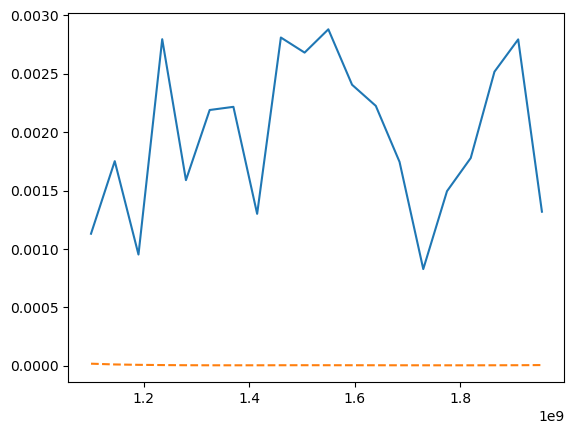

In [66]:
plt.plot(v_inner, yhat[20, 20:])
plt.plot(v_inner, y_test[20, 20:], '--')

In [159]:
from scipy.spatial.distance import cosine

In [162]:
distances = [cosine(y_test[i, 20:], yhat2[i]) for i in range(len(yhat2))]

In [163]:
sum(distances)

3.3517127909728277

In [200]:
max_fe = [max_fractional_error(y_test[i], yhat[i]).numpy() for i in range(len(yhat))]

In [201]:
mean_fe = [meanFE(y_test[i], yhat[i]).numpy() for i in range(len(yhat))]

In [202]:
bins = 10**np.histogram(np.log10(mean_fe))[1]

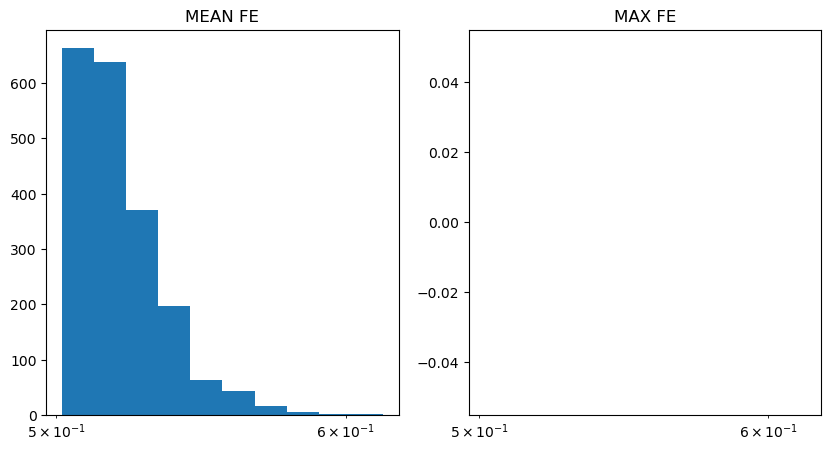

In [203]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(mean_fe, bins=bins)
plt.title('MEAN FE')
plt.xscale('log')
plt.subplot(1,2,2)

plt.hist(max_fe,bins=bins)
plt.title('MAX FE')
plt.xscale('log')

In [87]:
# NOT MY MODEL BUT LETS SEE WHAT HAPPEBNS


def train(model, X_train, Y_train, X_val, Y_val, **kwargs):
    
    X_train = tf.convert_to_tensor(X_train)
    Y_train = tf.convert_to_tensor(Y_train)
    Train = (X_train, Y_train)

    X_val = tf.convert_to_tensor(X_val)
    Y_val = tf.convert_to_tensor(Y_val)
    Val = (X_val, Y_val)
    
    cur_date_str = datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
    logdir="logs/scalars/" + cur_date_str
    tensorboard_callback = TensorBoard(log_dir=logdir)
    checkpoints_dir = os.path.join('checkpoints', cur_date_str)
    os.makedirs(checkpoints_dir, exist_ok=True)
    checkpointer_best = ModelCheckpoint(monitor='val_loss', 
                                        filepath=os.path.join(checkpoints_dir, 'grid_weights_best.h5'), 
                                        save_best_only=True, save_weights_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   min_delta=0, patience=500, 
                                   verbose=0, mode='auto', baseline=None, 
                                   restore_best_weights=True)
    fit_kwargs = dict(validation_data=Val, 
                  epochs=50000, batch_size=128,
                  callbacks=[checkpointer_best, tensorboard_callback, early_stopping], 
                  verbose=0)
    fit_kwargs.update(kwargs)

    model.fit(*Train, **fit_kwargs)

In [88]:
train(model, X_train, y_train, X_val, y_val)

: 

: 

In [ ]:
yhat = model.predict(X_test)
plt.plot(v_inner, yhat[0, 20:])
plt.plot(v_inner, y_test[0, 20:], '--')

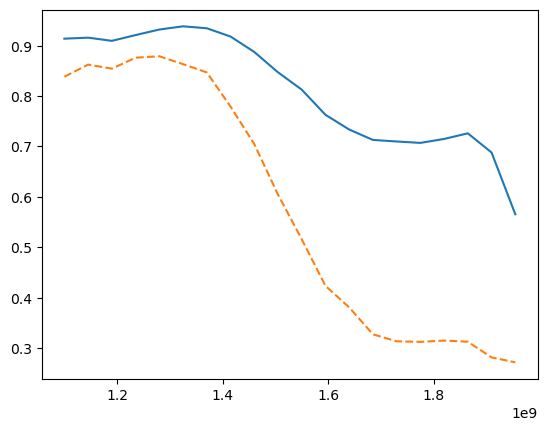

In [82]:
plt.plot(v_inner, yhat[1000, :20])
plt.plot(v_inner, y_test[1000, :20], '--')